In [1]:
%load_ext autoreload

import os
import sys

print(os.getcwd())
os.chdir(os.path.expanduser('~') + '/Code/vail')
print(os.getcwd())

/Users/msc/Code/vail/ml/notebooks
/Users/msc/Code/vail


In [2]:
%autoreload 2
import ml

In [3]:
o = ml.Options({'environment': 'walker2d-medium-replay-v2'})
d = ml.OfflineDataset(o)
d._build()

Output()

Output()

In [55]:
import matplotlib.pyplot as plt
import gym
import numpy as np
import torch
import d4rl
import random

from torchvision.transforms.functional import crop, resize
from einops import rearrange

from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np



In [5]:
rand = random.randint(0, len(d.data['frames']))

plt.imshow(d.data['frames'][rand].permute(1, 2, 0))
print(d.data['V'][rand:rand + 10])

AttributeError: 'OfflineDataset' object has no attribute 'data'

In [6]:
with ml.RedirectStream():
    env = gym.make(d.environment)

torch.Size([3, 32, 32])


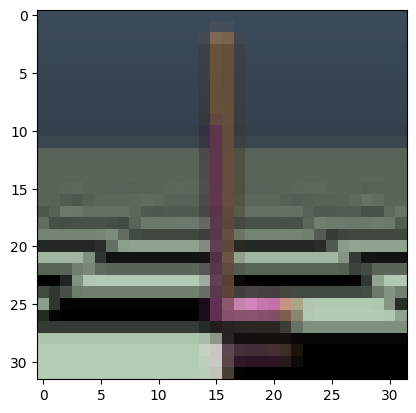

In [63]:
size = 32

# original: [ 256, 256, 3 ]

n = 10
frames = []

def get_image():

    rand = random.randint(0, n)
    qp, qv = d.QP[rand], d.QV[rand]
    env.set_state(qp, qv)  # type: ignore

    height, width = 256, 256
    with ml.RedirectStream():
        frame = env.sim.render(height, width, camera_name='track', mode='offscreen')  # type: ignore
    frame = np.flip(frame, axis=0)
    frame = torch.from_numpy(frame.copy())
    frame = frame.to(torch.uint8)
    frame = frame.permute(2, 0, 1)
    frame = crop(frame, top=64, left=64, width=128, height=192)
    frame = resize(frame, (size, size), antialias=True)

    return frame
    
frame = get_image()
print(frame.shape)
plt.imshow(frame.permute(1, 2, 0))

torch.Size([4, 4, 8, 8, 3])


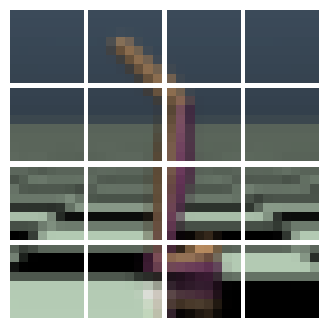

In [77]:

patch_size = 8
img = get_image()

img = rearrange(img, 'c (h ph) (w pw) -> h w ph pw c', ph=patch_size, pw=patch_size)

print(img.shape)
h, w, _, _, c = img.shape

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(h, w),  # creates 2x2 grid of axes
                 axes_pad=0.05,  # pad between axes in inch.
                 )

for i in range(h):
    for j in range(w):
        g = grid.axes_row[i][j]
        g.imshow(img[i, j])
        g.axis('off')

plt.show()